In [186]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

## 1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.**

In [187]:
# возвращаемся к задаче про репетиторов

In [188]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [189]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [190]:
X_st = X.copy()
X_st[:, 1:4] = standard_scale(X_st[:, 1:4])
X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [191]:
def calc_logloss(y, y_pred):
    err = 0
    for i in range(len(y)):  # для каждого элемента из массива У делаем проверку и выщитываем ошибку для каждого элемента, и сумму
        if y_pred[i] == 0:
            err += (1.0 - y[i]) * np.log(1.0 - y_pred[i])
        elif y_pred[i] == 1:
            err += y[i] * np.log(y_pred[i])
        else:
            err += y[i] * np.log(y_pred[i]) + (1.0 - y[i]) * np.log(1.0 - y_pred[i])
    return - err / len(y) #заменяет - np.mean

In [192]:
#проверяем все спорные случаи и убеждаемся, что сообщения об ошибке нет
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0])
calc_logloss(y1, y_pred1)

0.05268025782891314

In [193]:
y1 = np.array([1, 0])
y_pred1 = np.array([1, 0.1])
calc_logloss(y1, y_pred1)

0.05268025782891314

In [194]:
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

## 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным

In [195]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [196]:
z = np.linspace(-10, 10, 101)

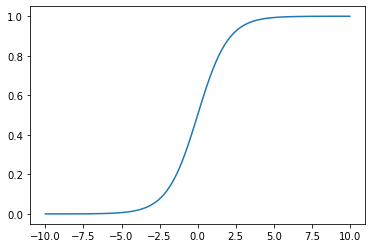

In [197]:
probabilities = sigmoid(z)

plt.plot(z, probabilities)
plt.show()

In [198]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            continue
            
    final_error = calc_logloss(y, y_pred) 
    print (final_error) #cделала вывод аргументов функции eval_model и ошибки, чтоб сравнить и отследить
    return W, final_error

In [199]:
n = X.shape[0]

etas = [1e-1, 5e-1, 1e-2, 5e-2, 1e-3, 5e-3]
iterations = [10, 100, 1000, 10000]

best_error = np.inf
best_params = {}


for eta in etas:
    for iteration in iterations:
        print (eta, iteration) #cделала вывод аргументов функции eval_model и ошибки, чтоб сравнить и отследить
        W, error = eval_model(X_st, y, iterations=iteration, eta=eta)
        if error < best_error:
            best_error = error
            best_params = {
                'iteration': iteration,
                'eta': eta
            }

print(f'Ошибка {best_error} при параметрах {best_params}')

0.1 10
0.6471695818389295
0.1 100
0.42694233400122894
0.1 1000
0.28444349877126673
0.1 10000
0.16699984940328444
0.5 10
0.47238920217428076
0.5 100
0.3230665388766182
0.5 1000
0.20436456104822748
0.5 10000
0.09944286508202023
0.01 10
0.7481074868242497
0.01 100
0.638428816819786
0.01 1000
0.4264848056300794
0.01 10000
0.28442840212636267
0.05 10
0.699954961620685
0.05 100
0.46782302750056626
0.05 1000
0.322786534142952
0.05 10000
0.2043674289448464
0.001 10
0.7596591304179555
0.001 100
0.7468503743478322
0.001 1000
0.6375783289684847
0.001 10000
0.426439271321205
0.005 10
0.7544927394500716
0.005 100
0.6945383737677024
0.005 1000
0.4673891750755401
0.005 10000
0.322758677384033
Ошибка 0.09944286508202023 при параметрах {'iteration': 10000, 'eta': 0.5}


## 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba)

In [200]:
def calc_pred_proba(W, X):
    y_pred_proba = sigmoid(np.dot(X, W))
    return y_pred_proba

In [201]:
calc_pred_proba(W, X_st)

array([0.33133474, 0.26998385, 0.91660538, 0.01870344, 0.64456505,
       0.41022263, 0.96117517, 0.19592658, 0.34773348, 0.88405523])

## 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred)

In [202]:
def calc_pred(W, X):
    y_pred = []
    y_pred_proba = calc_pred_proba(W, X)
         
    for pred in y_pred_proba:
        if pred > 0.5: 
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

In [203]:
pred = calc_pred(W, X_st)
pred

[0, 0, 1, 0, 1, 0, 1, 0, 0, 1]

## 5. *Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

In [204]:
pred = np.array(pred) #решила на всякий случай поменять, т.к. у меня возвращался list в прошлой задаче
type(pred)

numpy.ndarray

In [205]:
print(f'True \t  {y}')
print(f'Predicted {pred}')

True 	  [0 0 1 0 1 0 1 0 1 1]
Predicted [0 0 1 0 1 0 1 0 0 1]


In [226]:
#Accuracy

def accuracy(y, y_pred):
    accuracy = np.mean(y == y_pred)
    return accuracy

In [227]:
#матрица ошибок
#как я пояла, должна получиться матрица 2х2 - TP, FP / FN , TN

def err_matrix(y, y_pred):
    matrix = np.zeros((2, 2)) #создали сам каркас матрицы с нулями и будем прибавлять значения по условию
    for i in range(len(y)): 
        if y[i] == y_pred[i] == 1: #True positive
            matrix[0][0] += 1
        elif y[i] == y_pred[i] == 0: #True negative
            matrix[1][1] += 1
        elif y[i] == 1 and y_pred[i] == 0: #False negative
            matrix[1][0] += 1
        elif y[i] == 0 and y_pred[i] == 1: #False positive
            matrix[0][1] += 1
    return matrix

In [228]:
#Precision

def precision(y, y_pred):
    matrix = err_matrix(y, pred)
    precision = matrix[0][0] / (matrix[0][0] + matrix[0][1]) #TP/(TP+FP)
    return precision

In [229]:
#Recall

def recall(y, y_pred):
    matrix = err_matrix(y, pred)
    recall = matrix[0][0] / (matrix[0][0] + matrix[1][0]) #TP/(TP+FN)
    return recall

In [232]:
#F1-score

def f1_score(y, y_pred):
    prec = precision(y, y_pred)
    rec = recall(y, y_pred)
    f1_score = 2 * prec * rec / (prec + rec)
    return f1_score

In [233]:
#а теперь дружно выводим все значения)))
print(f'Метрика accuracy: ', accuracy(y, pred))
print(f'Матрица ошибок:\n', err_matrix(y, pred))
print(f'Рrecision: ', precision(y, pred))
print(f'Recall: ', recall(y, pred))
print(f'F1-score: ', f1_score(y, pred))

Метрика accuracy:  0.9
Матрица ошибок:
 [[4. 0.]
 [1. 5.]]
Рrecision:  1.0
Recall:  0.8
F1-score:  0.888888888888889


## 6. Могла ли модель переобучиться? Почему?

Если в результате выбранных количества итераций и ETA с целью минимизации log loss он в итоге приблизился или равен 0, значит функция заучила выборку train и на test покажет плохой результат